# Load Files

In [1]:
import re

f = open('./annotated_data_500/pretty_0611_lcad.txt')
content = f.read()
f.close()
examples = content.split("==========================================")[1:]

labelled_corpus = []

for item in examples:
    temp = item.split('\n')
    labelled_corpus.append(temp[2][4:].strip())
    

labelled_corpus[:10]

['breitbart--2019-09-21--Bokhari Elites Want You to Eat Bugs Live in Sewer Pipes and Submit to Population Control',
 'nationalreview--2019-04-24--The UKs Version of the Green New Deal Has No Idea What Its Doing',
 'bbc--2018-09-28--Tsunami hits Indonesias Palu after strong earthquake',
 'dailymail--2018-07-24--Trumps border wall between US and Mexico will threaten 1500 species',
 'rt--2018-03-21--Next Deepwater Horizon disaster a matter of time Critics slam record offshore oil lease sale',
 'thedailycaller--2019-11-06--Green New Deal Dems Toss Their Support Behind Report Pushing To Fast-Track Population Control',
 'thehuffingtonpost--2019-01-08--US Emissions Spike Undercuts Trump Administration Push For Fossil Fuel Use',
 'foxnews--2019-08-22--Sanders releases 16 trillion Green New Deal plan promises it will pay for itself',
 'The Huffington Post--2017-08-02--Trump To Forgo Environmental Laws To Expedite Border Wall Construction.txt',
 'Breitbart--2017-06-02--In Embarrassing Anti-Trump

In [2]:
import pandas as pd
# the entire corpus
unlabelled_corpus = pd.read_csv("./unlabelled_articles_17K/opinion_climate_all_with_bias.csv")


unlabelled_corpus[:5]

,id,date,source,title,content,author,url,published,published_utc,collection_utc,keywords,opinion,content_words,title_words,uk,aggregated_label,mbfc
0,theblaze--2020-02-17--Climate change alarmist ...,2020/2/17,theblaze,"Climate change alarmist John Legend, wife Chri...",Grammy-winning singer and climate change alarm...,Phil Shiver,https://www.theblaze.com/news/john-legend-used...,"Mon, 17 Feb 2020 14:58:06 +0000",1.581969e+09,1.581984e+09,"[set(), {'climate'}]",False,316,19,False,1.0,right_bias
1,theblaze--2020-05-15--Left's 'Green' policies ...,2020/5/15,theblaze,Left's 'Green' policies are dangerous during a...,Leftists tout their ridiculous `` Green '' pol...,BlazeTV Staff,https://www.theblaze.com/louder-with-crowder/l...,"Fri, 15 May 2020 21:47:53 +0000",1.589594e+09,1.589592e+09,"[set(), {'climate'}]",False,352,8,False,1.0,right_bias
2,theblaze--2020-10-08--Horowitz: Kamala Harris'...,2020/10/8,theblaze,Horowitz: Kamala Harris' stunning reversal on ...,What a difference a general election debate ma...,Daniel Horowitz,https://www.theblaze.com/op-ed/horowitz-kamala...,"Thu, 08 Oct 2020 15:55:00 +0000",1.602187e+09,1.602209e+09,"[set(), {'fossil fuel', 'climate', 'environmen...",False,1035,8,False,1.0,right_bias
3,vox--2020-01-08--7 things everyone should know...,2020/1/8,vox,7 things everyone should know about Australia’...,"Since September , 15.6 million acres of Austra...",Brian Resnick,https://www.vox.com/science-and-health/2020/1/...,2020-01-08T15:20:00-05:00,1.578515e+09,1.578529e+09,"[set(), {'precipitation', 'arctic', 'ecosystem...",False,2419,9,False,0.0,left_bias
4,vox--2020-01-09--The viral false claim that ne...,2020/1/9,vox,The viral false claim that nearly 200 arsonist...,A false claim that a big wave of arson is driv...,Umair Irfan,https://www.vox.com/2020/1/9/21058332/australi...,2020-01-09T18:10:00-05:00,1.578611e+09,1.578615e+09,"[set(), {'fire hazard', 'fire risk', 'climate'...",False,1390,14,False,0.0,left_bias


In [3]:
# get id from labelled corpus
labelled_corpus_content = []
for i in range(0, len(labelled_corpus)):
    for j in range(0, unlabelled_corpus.shape[0]):
        if labelled_corpus[i] == unlabelled_corpus['id'][j]:
            labelled_corpus_content.append(unlabelled_corpus['content'][j])
            break

labelled_corpus_content[-3:]

['The City of Lights, Paris, has been illuminated in recent days by cars set alight by thousands of protesting “Yellow Vests”—largely middle class people who earn their living by driving or who commute to get to work. The cause of their ire is a scheduled 25 cents-per-gallon increase in gas taxes, and about 10 cents on diesel, to fight climate change.$NEWLINE$$NEWLINE$French President Macron, deeply unpopular, just reversed course on the new green tax—Parisians are already paying about $7.06 per gallon for gasoline, almost half of that in taxes.$NEWLINE$$NEWLINE$If Paris streets burned over a proposed\xa025 cents per gallon climate change tax, imagine the global conflagration over a $49 per gallon tax.$NEWLINE$$NEWLINE$That’s what a United Nations special climate report calls for in 12 years, with a carbon tax of $5,500 per ton—equal to $49 per gallon of gasoline or diesel. That’s about 100 times today’s average state and federal motor fuels tax.$NEWLINE$$NEWLINE$By 2100, the U.N. esti

In [4]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

stop_words = set([lemmatizer.lemmatize(word) for word in stopwords.words('english')])

# manually add some salient stopwords
with open('./utils/stopwords.txt') as f:
    lines = f.readlines()
for line in lines:
    stop_words.add(lemmatizer.lemmatize(line.strip('\n').strip()))

def lemmatize_and_remove_stopwords(text:str) -> list:

    word_tokens = word_tokenize(text)


    filtered_sentence = []

    for w in word_tokens:
        w_processed = lemmatizer.lemmatize(w.strip())
        if w_processed not in stop_words:
            filtered_sentence.append(w_processed)


    return filtered_sentence

def filter(text:str) -> str:
    pattern = re.compile("[^ ^a-z^A-Z^0-9]")
    text = pattern.sub('', text)

    text = re.sub(" +", " ", text)
    return text

def collect_frequently_words(corpus) -> dict:
    freq_dict = dict()

    for sentence in corpus:
        for w in sentence:
            if w in freq_dict.keys():
                freq_dict[w] += 1
            else:
                freq_dict[w] = 1

    return freq_dict

def clean_text(text:str) -> list:

    text = re.sub(r"$NEWLINE$", "", text)
    text = re.sub(r"NEWLINE", "", text)

    # remove urls
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text)
    # remove @somebody
    text = re.sub(r"@\S+", "", text)

    # remove #topic
    text = re.sub(r"#\S+", "", text)

    # clean unrecognizable characters
    text = filter(text)

    text = text.lower()

    text = lemmatize_and_remove_stopwords(text)

    return text

In [5]:
# clean text

labelled_corpus_content_cleaned = []
for doc in labelled_corpus_content:
    labelled_corpus_content_cleaned.append(clean_text(doc))

labelled_corpus_content_cleaned[:2]

[['progressive',
  'political',
  'elite',
  'decided',
  'save',
  'environment',
  'ordinary',
  'citizen',
  'submit',
  'radical',
  'lifestyle',
  'elite',
  'fly',
  'private',
  'jet',
  'enrich',
  'trade',
  'china',
  'biggest',
  'polluterthe',
  'reality',
  'worse',
  'headline',
  'progressive',
  'environmentalist',
  'suggested',
  'switch',
  'diet',
  'bug',
  'meat',
  'steak',
  'cow',
  'fart',
  'produce',
  'carbon',
  'dontcha',
  'swedish',
  'scientist',
  'suggested',
  'devour',
  'flesh',
  'deceased',
  'humansto',
  'cut',
  'greenhouse',
  'emissionsthis',
  'article',
  'published',
  'bynewsweek',
  'psychologist',
  'mused',
  'human',
  'taboo',
  'cannibalism',
  'noting',
  'thatphilosophers',
  'argued',
  'burying',
  'dead',
  'wasteful',
  'context',
  'fight',
  'hungercannibalism',
  'theyve',
  'gonepopulation',
  'control',
  'solution',
  'embraced',
  'genius',
  'left',
  'dystopian',
  'idea',
  'attracted',
  'attention',
  'bernie',
 

In [6]:
labelled_freq_dict = collect_frequently_words(labelled_corpus_content_cleaned)

freq_list = sorted(labelled_freq_dict.items(), key = lambda kv:(kv[1], kv[0]))[:20]

In [7]:
for i in range(0, len(labelled_corpus_content_cleaned)):
    sentence = labelled_corpus_content_cleaned[i]
    temp = sentence
    for w in sentence:
        if labelled_freq_dict[w] < 10: # a threshold
            temp.remove(w)
    labelled_corpus_content_cleaned[i] = temp

labelled_corpus_content_cleaned[0]

['progressive',
 'political',
 'elite',
 'decided',
 'save',
 'environment',
 'citizen',
 'submit',
 'radical',
 'lifestyle',
 'elite',
 'fly',
 'private',
 'jet',
 'trade',
 'china',
 'biggest',
 'reality',
 'worse',
 'headline',
 'progressive',
 'environmentalist',
 'suggested',
 'diet',
 'meat',
 'cow',
 'produce',
 'carbon',
 'swedish',
 'scientist',
 'suggested',
 'humansto',
 'cut',
 'greenhouse',
 'article',
 'published',
 'psychologist',
 'human',
 'cannibalism',
 'noting',
 'argued',
 'dead',
 'context',
 'fight',
 'theyve',
 'control',
 'solution',
 'embraced',
 'left',
 'idea',
 'attention',
 'bernie',
 'sander',
 'brought',
 'democrat',
 'presidential',
 'debate',
 'people',
 'curb',
 'population',
 'sander',
 'idea',
 'dream',
 'progressive',
 'environmentalist',
 '2009',
 'study',
 'estimated',
 'human',
 'child',
 'produce',
 'average',
 'metric',
 'ton',
 'carbon',
 'dioxide',
 'scientist',
 'global',
 'population',
 'control',
 'bernie',
 'china',
 'pollution',
 'offer

# LDA

## For labelled corpus
- to provide insight for frames

In [9]:
import gensim
from gensim import corpora

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

labelled_corpus_dict = corpora.Dictionary(labelled_corpus_content_cleaned)

labelled_corpus_index = [labelled_corpus_dict.doc2bow(item) for item in labelled_corpus_content_cleaned]

labelled_corpus_index[:2]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 2),
  (10, 1),
  (11, 2),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 3),
  (18, 1),
  (19, 1),
  (20, 3),
  (21, 1),
  (22, 1),
  (23, 2),
  (24, 1),
  (25, 2),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 2),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 2),
  (55, 3),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 3),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 2),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 2),
  (77, 3),
  (78, 1),
  (79, 1),
  (80, 2),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 2),
  (85, 1),
  (86, 2),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1)

In [20]:
lda_model = LdaModel(labelled_corpus_index, num_topics=20, id2word=labelled_corpus_dict, passes=20, random_state=1)

lda_model.print_topics(num_topics=20, num_words=15)

[(0,
  '0.028*"fire" + 0.014*"island" + 0.013*"water" + 0.012*"wildfire" + 0.010*"forest" + 0.009*"environmental" + 0.007*"california" + 0.006*"study" + 0.006*"ocean" + 0.006*"amazon" + 0.006*"time" + 0.006*"global" + 0.005*"brazil" + 0.005*"sea" + 0.005*"tree"'),
 (1,
  '0.010*"national" + 0.010*"park" + 0.007*"environmental" + 0.007*"tree" + 0.006*"base" + 0.006*"water" + 0.006*"government" + 0.005*"people" + 0.005*"environment" + 0.005*"country" + 0.004*"force" + 0.004*"report" + 0.004*"temperature" + 0.004*"air" + 0.004*"scientist"'),
 (2,
  '0.009*"land" + 0.008*"plan" + 0.008*"water" + 0.008*"food" + 0.007*"environmental" + 0.007*"green" + 0.006*"deal" + 0.006*"candidate" + 0.006*"report" + 0.006*"public" + 0.006*"warren" + 0.005*"gas" + 0.004*"trump" + 0.004*"waste" + 0.004*"call"'),
 (3,
  '0.015*"green" + 0.013*"deal" + 0.012*"fuel" + 0.012*"plan" + 0.009*"fossil" + 0.009*"democratic" + 0.009*"energy" + 0.008*"candidate" + 0.007*"democrat" + 0.006*"company" + 0.006*"policy" + 

In [50]:
lda_model.log_perplexity(labelled_corpus_index)

-8.651557659433626

In [51]:
lda_cm = CoherenceModel(model=lda_model, texts=labelled_corpus_content_cleaned, dictionary=labelled_corpus_dict, coherence='c_v')

lda_cm.get_coherence()

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def calc_metric(topic_number, metric, corpus_index, corpus_dict, corpus):
    lda_model = LdaModel(corpus_index, num_topics=topic_number, id2word=corpus_dict, passes=20, random_state=1)
    if metric == 'Coherence' or metric == 'coherence':
        lda_cm = CoherenceModel(model=lda_model, texts=corpus, dictionary=corpus_dict, coherence='c_v')

        return lda_cm.get_coherence()
    elif metric == 'Perplexity' or metric == 'perplexity':
        return lda_model.log_perplexity(corpus_index)

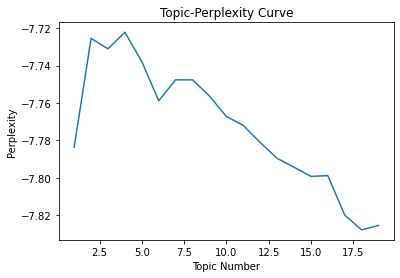

In [22]:
# Topic-perplexity
x = np.arange(1, 20)
y = [calc_metric(i, 'perplexity', labelled_corpus_index, labelled_corpus_dict, labelled_corpus_content_cleaned) for i in x]
plt.plot(x, y)
plt.xlabel('Topic Number')
plt.ylabel('Perplexity')

plt.title('Topic-Perplexity Curve')
plt.show()

# 4 is best

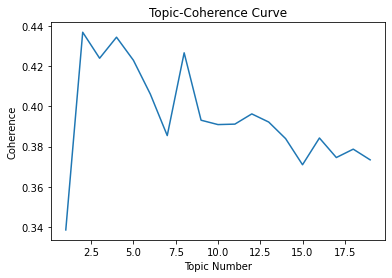

In [23]:
# Topic-coherence

x = np.arange(1, 20)
# z = [perplexity(i) for i in x]  #if use perplexity
y = [calc_metric(i, 'coherence', labelled_corpus_index, labelled_corpus_dict, labelled_corpus_content_cleaned) for i in x]
plt.plot(x, y)
plt.xlabel('Topic Number')
plt.ylabel('Coherence')

plt.title('Topic-Coherence Curve')
plt.show()

# 2 is best here

In [10]:
import pyLDAvis.gensim_models

lda_model = LdaModel(labelled_corpus_index, num_topics=20, id2word=labelled_corpus_dict, passes=20, random_state=42)

temp = pyLDAvis.gensim_models.prepare(lda_model, labelled_corpus_index, labelled_corpus_dict, mds = 'pcoa', sort_topics = True)

pyLDAvis.save_html(temp, 'lda_result.html')

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, labelled_corpus_index, labelled_corpus_dict)
pyLDAvis.save_html(vis, 'lda_result.html') 
vis

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.129377 -0.016622       1        1  19.197180
0     -0.146080 -0.005980       2        1  15.673593
1     -0.064422 -0.118045       3        1  13.185755
15    -0.172450  0.086015       4        1   9.877522
11    -0.162375  0.089657       5        1   7.516372
17    -0.038697 -0.054228       6        1   4.495770
16     0.019470 -0.110161       7        1   3.531314
6     -0.007516 -0.051428       8        1   3.251521
10    -0.021394  0.007969       9        1   3.244525
3     -0.033191  0.035948      10        1   2.948098
5      0.050610 -0.073763      11        1   2.933119
12     0.055268 -0.090021      12        1   2.619603
9     -0.039434  0.055633      13        1   2.439659
14     0.010268  0.011478      14        1   2.332182
19     0.089030 -0.074351      15        1   2.185293
18     0.052569 -0.030923      16        1   1.776222
13     0.041901  0.124436      17        1   1.207193
4      0.148735  0.067186      18        1   0.608541
2      0.145017  0.107554      19        1   0.585390
7      0.202068  0.039647      20        1   0.391146, topic_info=       Term         Freq        Total Category  logprob  loglift
17   carbon   614.000000   614.000000  Default  30.0000  30.0000
973     epa   466.000000   466.000000  Default  29.0000  29.0000
615   water   507.000000   507.000000  Default  28.0000  28.0000
499   trump  1069.000000  1069.000000  Default  27.0000  27.0000
333    fire   201.000000   201.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
610    time     1.895198   416.282146  Topic20  -5.4410   0.1518
71   global     1.873001   654.178350  Topic20  -5.4527  -0.3120
712  amount     1.481720    86.051655  Topic20  -5.6871   1.4821
77    human     1.575481   212.827985  Topic20  -5.6257   0.6379
535     day     1.482180   213.612418  Topic20  -5.6868   0.5732

[1448 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
2982      2  0.087002   10000
2982      4  0.261006   10000
2982      7  0.087002   10000
2982     12  0.087002   10000
2982     14  0.087002   10000
...     ...       ...     ...
805       7  0.302319   zinke
805      10  0.581382   zinke
2399      3  0.081414  zinkes
2399      7  0.162828  zinkes
2399     10  0.651311  zinkes

[5430 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 1, 2, 16, 12, 18, 17, 7, 11, 4, 6, 13, 10, 15, 20, 19, 14, 5, 3, 8])

In [ ]:
lda_model.print_topics(num_topics=20, num_words=30)

## Topics & Frames

In [11]:
# collect frames
import json

annotated_file = open("./annotated_data_500/0611_majority.json", 'r', encoding='utf-8')

annotated_file = json.load(annotated_file)

ar = list()
hi = list()
mo = list()
co = list()
ec = list()

keys = list(annotated_file.keys())

for i in range(len(keys)):
    # by outlets
    temp = annotated_file[keys[i]]
    # Attribution of Responsibility
    # question answer may not exist, like hi1, so here we must examine the key
    if 'ar2' in temp.keys():
        if temp['ar2'][0] == 'yes':
            ar.append(i)
    elif 'ar6' in temp.keys():
        if temp['ar6'][0] == 'yes':
            ar.append(i)

    # Human Interest
    if 'hi1' in temp.keys():
        if temp['hi1'][0] == 'yes':
            hi.append(i)
    elif 'hi2' in temp.keys():
        if temp['hi2'][0] == 'yes':
            hi.append(i)
    elif 'hi5' in temp.keys():
        if temp['hi5'][0] == 'yes':
            hi.append(i)

    # Morality
    if 'mo1' in temp.keys():
        if temp['mo1'][0] == 'yes':
            mo.append(i)
    elif 'mo2' in temp.keys():
        if temp['mo2'][0] == 'yes':
            mo.append(i)

    # Conflict
    if 'co1' in temp.keys():
        if temp['co1'][0] == 'yes':
            co.append(i)
    elif 'co2' in temp.keys():
        if temp['co2'][0] == 'yes':
            co.append(i)
    elif 'co3' in temp.keys():
        if temp['co3'][0] == 'yes':
            co.append(i)

    # Economic
    if 'ec1' in temp.keys():
        if temp['ec1'][0] == 'yes':
            ec.append(i)
    elif 'ec2' in temp.keys():
        if temp['ec2'][0] == 'yes':
            ec.append(i)
    elif 'ec3' in temp.keys():
        if temp['ec3'][0] == 'yes':
            ec.append(i)

# now they are assigned to the index of labelled corpus

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# assign topics

import numpy as np


val_topics = lda_model.inference(labelled_corpus_index)
num_topics = val_topics[0].shape[1]
topics = []

for item in val_topics[0]:
    topics.append(np.argmax(item))

topics[:10], num_topics

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


([8, 1, 12, 12, 0, 1, 0, 15, 12, 8], 20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


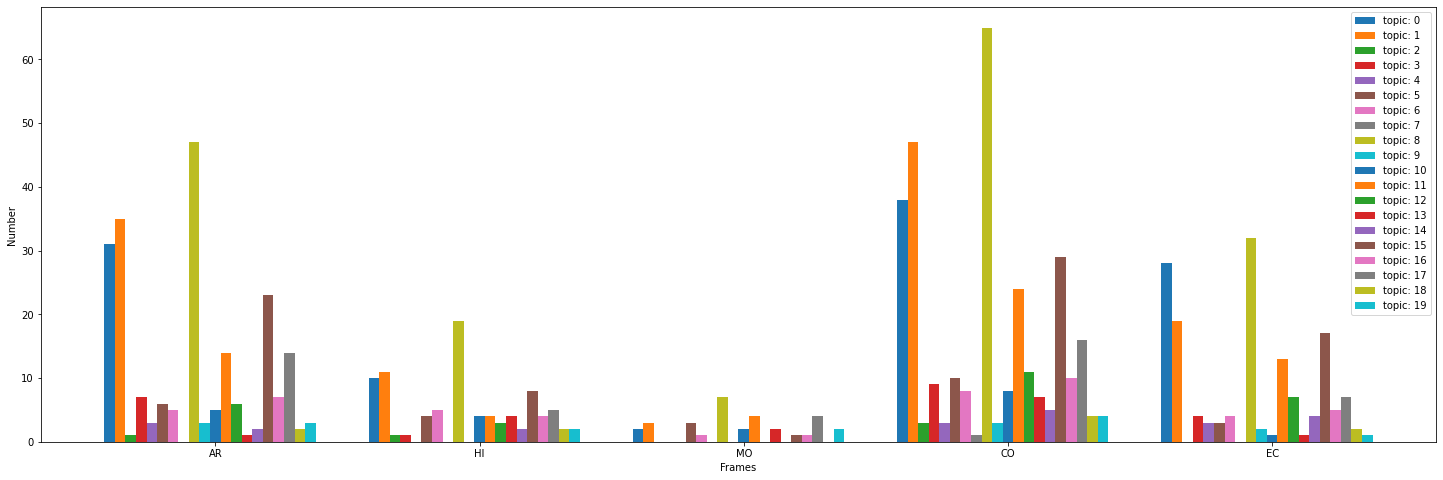

In [35]:
# plot
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['figure.figsize'] = (25.0, 8.0)

size = 5
num_topics = 20
x = np.arange(size)
ys = list()

for i in range(0, num_topics):
    ar_topic = list()
    hi_topic = list()
    mo_topic = list()
    co_topic = list()
    ec_topic = list()
    for j in range(0, len(topics)):
        
        if topics[j] == i:
            if j in ar:
                ar_topic.append(j)
            if j in hi:
                hi_topic.append(j)
            if j in mo:
                mo_topic.append(j)
            if j in co:
                co_topic.append(j)
            if j in ec:
                ec_topic.append(j)
    ys.append(np.array([len(ar_topic),len(hi_topic),len(mo_topic),len(co_topic),len(ec_topic)]))

total_width = 0.8
width = total_width / num_topics
x = x - (total_width - width) / 2

for i in range(0, num_topics):
    plt.bar(x + i * width, ys[i], width=width, label='topic: '+str(i))

plt.legend()
plt.xticks([i+10*width for i in x], ['AR','HI','MO','CO','EC'])
plt.ylabel('Number')
plt.xlabel("Frames")
plt.savefig('./output/topic-frame.png', dpi=500)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[], [4], [], []]
[[], [4], [], [6]]
[[], [4], [], [6, 16]]
[[], [4], [25], [6, 16]]
[[38], [4], [25], [6, 16]]
[[38], [4], [25], [6, 16, 43]]
[[38], [4, 46], [25], [6, 16, 43]]
[[38], [4, 46], [25, 51], [6, 16, 43]]
[[38, 52], [4, 46], [25, 51], [6, 16, 43]]
[[38, 52], [4, 46], [25, 51], [6, 16, 43, 64]]
[[38, 52], [4, 46, 68], [25, 51], [6, 16, 43, 64]]
[[38, 52, 69], [4, 46, 68], [25, 51], [6, 16, 43, 64]]
[[38, 52, 69], [4, 46, 68, 81], [25, 51], [6, 16, 43, 64]]
[[38, 52, 69], [4, 46, 68, 81], [25, 51, 92], [6, 16, 43, 64]]
[[38, 52, 69], [4, 46, 68, 81], [25, 51, 92, 96], [6, 16, 43, 64]]
[[38, 52, 69], [4, 46, 68, 81, 108], [25, 51, 92, 96], [6, 16, 43, 64]]
[[38, 52, 69, 121], [4, 46, 68, 81, 108], [25, 51, 92, 96], [6, 16, 43, 64]]
[[38, 52, 69, 121], [4, 46, 68, 81, 108], [25, 51, 92, 96], [6, 16, 43, 64, 126]]
[[38, 52, 69, 121], [4, 46, 68, 81, 108], [25, 51, 92, 96], [6, 16, 43, 64, 126, 127]]
[[38, 52, 69, 121], [4, 46, 68, 81, 108], [25, 51, 92, 96], [6, 16, 43, 64, 126,

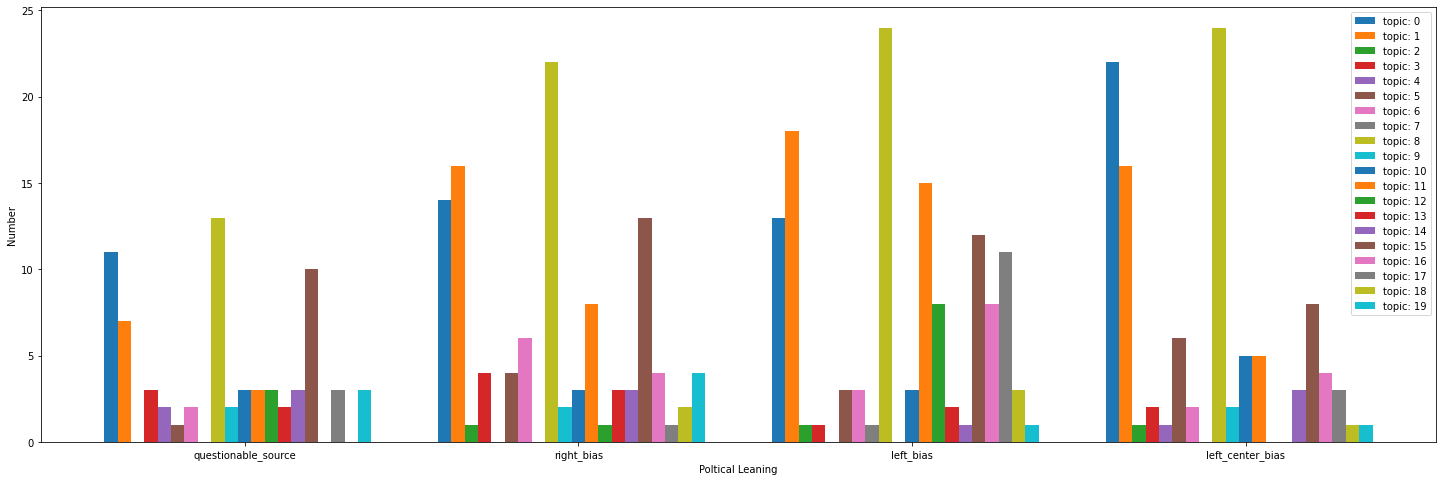

In [45]:
import json


mbfcs = dict()

for i in range(len(keys)):
    temp = annotated_file[keys[i]]
    # by mbfc
    if "_mbfc" in temp.keys():
        if "_mbfc" in temp.keys():
            if temp["_mbfc"] in mbfcs.keys():
                mbfcs[temp["_mbfc"]].append(str(i))
            else:
                mbfcs[temp["_mbfc"]] = [str(i)]


size = len(mbfcs.keys())
x = np.arange(size)
ys = list()
for i in range(0, num_topics):
    temp = []
    for j in range(size):
        temp.append([])
    for k in range(len(topics)):
        if topics[k] == i:
            for j in range(size):
                if str(k) in mbfcs[list(mbfcs.keys())[j]]:
                    temp[j].append(k)
    ys.append([len(item) for item in temp])

total_width = 0.8
width = total_width / num_topics
x = x - (total_width - width) / 2

for i in range(0, num_topics):
    plt.bar(x + i * width, ys[i], width=width, label='topic: '+str(i))

plt.legend()
plt.xticks([i+10*width for i in x], list(mbfcs.keys()))
plt.ylabel('Number')
plt.xlabel("Poltical Leaning")
plt.savefig('./output/topic-politc.png', dpi=500)
plt.show()
    

## For the entire corpus
- exploratory analysis

In [4]:
unlabelled_corpus_content = unlabelled_corpus['content']

# clean text
unlabelled_corpus_content_cleaned = []
for doc in unlabelled_corpus_content:
    unlabelled_corpus_content_cleaned.append(clean_text(doc))

unlabelled_corpus_content_cleaned[:2]

[['grammywinning',
  'singer',
  'alarmist',
  'john',
  'legend',
  'private',
  'jet',
  'activist',
  'wife',
  'chrissy',
  'teigen',
  'quick',
  'valentine',
  'day',
  'dinner',
  'weekend',
  'local',
  'restaurant',
  'completely',
  'booked',
  'conscious',
  'couple',
  'elected',
  'hire',
  'private',
  'jet',
  'fly',
  '500',
  'mile',
  'beverly',
  'hill',
  'french',
  'laundry',
  'restaurant',
  'yountville',
  'california',
  'dined',
  'caviar',
  'daily',
  'mail',
  'reported',
  'teigen',
  'shared',
  'clip',
  'experience',
  'instagram',
  'story',
  'relaxing',
  'husband',
  'dinner',
  'daily',
  'mail',
  'captured',
  'clip',
  'produced',
  'video',
  'legend',
  'shared',
  'photo',
  'wife',
  'instagram',
  'restaurant',
  'private',
  'jet',
  'excursion',
  'nt',
  'match',
  'legend',
  'alarmism',
  'twitter',
  'express',
  'support',
  'teenage',
  'activist',
  'greta',
  'thunberg',
  'joining',
  'thunberg',
  'global',
  'strike',
  'strik

In [5]:
unlabelled_freq_dict = collect_frequently_words(unlabelled_corpus_content_cleaned)

freq_list = sorted(unlabelled_freq_dict.items(), key = lambda kv:(kv[1], kv[0]))[:20]

In [6]:
for i in range(0, len(unlabelled_corpus_content_cleaned)):
    sentence = unlabelled_corpus_content_cleaned[i]
    temp = sentence
    for w in sentence:
        if unlabelled_freq_dict[w] < 10: # a threshold
            temp.remove(w)
    unlabelled_corpus_content_cleaned[i] = temp

unlabelled_corpus_content_cleaned[0]

['singer',
 'alarmist',
 'john',
 'legend',
 'private',
 'jet',
 'activist',
 'wife',
 'chrissy',
 'teigen',
 'quick',
 'valentine',
 'day',
 'dinner',
 'weekend',
 'local',
 'restaurant',
 'completely',
 'booked',
 'conscious',
 'couple',
 'elected',
 'hire',
 'private',
 'jet',
 'fly',
 '500',
 'mile',
 'beverly',
 'hill',
 'french',
 'laundry',
 'restaurant',
 'california',
 'caviar',
 'daily',
 'mail',
 'reported',
 'teigen',
 'shared',
 'clip',
 'experience',
 'instagram',
 'story',
 'relaxing',
 'husband',
 'dinner',
 'daily',
 'mail',
 'captured',
 'clip',
 'produced',
 'video',
 'legend',
 'shared',
 'photo',
 'wife',
 'instagram',
 'restaurant',
 'private',
 'jet',
 'excursion',
 'nt',
 'match',
 'legend',
 'alarmism',
 'twitter',
 'express',
 'support',
 'teenage',
 'activist',
 'greta',
 'thunberg',
 'joining',
 'thunberg',
 'global',
 'strike',
 'strike',
 'website',
 'call',
 '2020',
 'critical',
 'refuse',
 'participate',
 'society',
 'economy',
 'actively',
 'destroying'

In [7]:
import gensim
from gensim import corpora

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

unlabelled_corpus_dict = corpora.Dictionary(unlabelled_corpus_content_cleaned)

unlabelled_corpus_index = [unlabelled_corpus_dict.doc2bow(item) for item in unlabelled_corpus_content_cleaned]

unlabelled_corpus_index[:2]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 2),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 2),
  (24, 1),
  (25, 2),
  (26, 1),
  (27, 1),
  (28, 2),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 2),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 2),
  (49, 1),
  (50, 3),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 4),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 2),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 2),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 3),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 3),
  (76, 2),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 2),
  (82, 2),
  (83, 1),
  (84, 2),
  (85, 2),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1)

In [15]:
lda_model = LdaModel(unlabelled_corpus_index, num_topics=20, id2word=unlabelled_corpus_dict, passes=20, random_state=42)

lda_model.print_topics(num_topics=20, num_words=30)

[(0,
  '0.041*"earthquake" + 0.023*"quake" + 0.015*"magnitude" + 0.012*"nuclear" + 0.011*"radiation" + 0.010*"building" + 0.009*"mexico" + 0.009*"mile" + 0.008*"people" + 0.008*"tsunami" + 0.008*"damage" + 0.008*"5g" + 0.007*"hit" + 0.007*"struck" + 0.007*"reported" + 0.006*"city" + 0.006*"wireless" + 0.006*"warning" + 0.006*"fault" + 0.005*"survey" + 0.005*"geological" + 0.005*"phone" + 0.005*"report" + 0.005*"aftershock" + 0.005*"time" + 0.005*"seismic" + 0.005*"resident" + 0.004*"north" + 0.004*"wave" + 0.004*"island"'),
 (1,
  '0.022*"biden" + 0.016*"candidate" + 0.015*"democratic" + 0.014*"green" + 0.013*"campaign" + 0.012*"deal" + 0.011*"plan" + 0.010*"sander" + 0.009*"president" + 0.009*"presidential" + 0.009*"debate" + 0.007*"issue" + 0.007*"ocasiocortez" + 0.006*"democrat" + 0.006*"warren" + 0.006*"policy" + 0.006*"people" + 0.006*"2020" + 0.006*"american" + 0.005*"joe" + 0.005*"support" + 0.005*"voter" + 0.005*"progressive" + 0.004*"harris" + 0.004*"sen" + 0.004*"health" + 0.

In [11]:
lda_model.log_perplexity(unlabelled_corpus_index)

-10.45027152076732

In [12]:
lda_cm = CoherenceModel(model=lda_model, texts=unlabelled_corpus_content_cleaned, dictionary=unlabelled_corpus_dict, coherence='c_v')

lda_cm.get_coherence()

0.5783597547761223

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


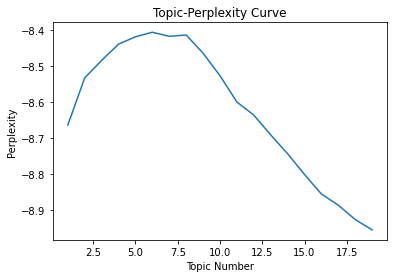

In [32]:
# Topic-perplexity
x = np.arange(1, 20)
y = [calc_metric(i, 'perplexity', unlabelled_corpus_index, unlabelled_corpus_dict, unlabelled_corpus_content_cleaned) for i in x]
plt.plot(x, y)
plt.xlabel('Topic Number')
plt.ylabel('Perplexity')

plt.title('Topic-Perplexity Curve')
plt.savefig('./output/topic_perplexity_17k.png')
plt.show()

# 6/8 is best


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


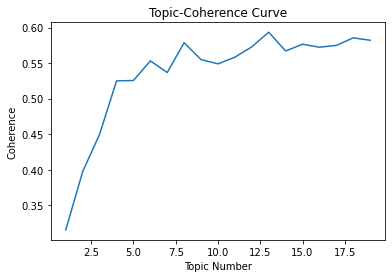

In [33]:
# Topic-coherence

x = np.arange(1, 20)
# z = [perplexity(i) for i in x]  #if use perplexity
y = [calc_metric(i, 'coherence', unlabelled_corpus_index, unlabelled_corpus_dict, unlabelled_corpus_content_cleaned) for i in x]
plt.plot(x, y)
plt.xlabel('Topic Number')
plt.ylabel('Coherence')

plt.title('Topic-Coherence Curve')
plt.savefig('./output/topic_coherence_17k.png')
plt.show()

# 13 is best (or 18)

In [8]:
import pyLDAvis.gensim_models

num_topics = 20

lda_model = LdaModel(unlabelled_corpus_index, num_topics=num_topics, id2word=unlabelled_corpus_dict, passes=20, random_state=42)

temp = pyLDAvis.gensim_models.prepare(lda_model, unlabelled_corpus_index, unlabelled_corpus_dict, mds = 'pcoa', sort_topics = True)

pyLDAvis.save_html(temp, 'lda_result_17k_'+str(num_topics)+'_topics.html')

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, unlabelled_corpus_index, unlabelled_corpus_dict)
pyLDAvis.save_html(vis, 'lda_result_17k_'+str(num_topics)+'_topics.html') 
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
8     -0.022115  0.139160       1        1  9.390802
3     -0.146272  0.055561       2        1  8.643826
1     -0.215250  0.028455       3        1  7.359426
19     0.005882 -0.131728       4        1  7.227531
13    -0.042356  0.084886       5        1  7.056599
16    -0.221174  0.004016       6        1  6.870621
4     -0.190334  0.041500       7        1  6.238786
12    -0.143166  0.088281       8        1  5.556534
6      0.084162  0.103458       9        1  5.181471
9     -0.206811 -0.112125      10        1  4.847015
17     0.112792  0.031790      11        1  4.798156
11     0.097087 -0.174894      12        1  4.053826
2      0.155571  0.058021      13        1  3.666362
10     0.069172 -0.212735      14        1  3.394056
14     0.156041  0.156796      15        1  2.977539
5      0.111972  0.160980      16        1  2.965358
18     0.207652  0.078347      17        1  2.583117
0      0.105228 -0.227713      18        1  2.499081
7      0.108794 -0.067149      19        1  2.409069
15    -0.026875 -0.104907      20        1  2.280827, topic_info=              Term          Freq         Total Category  logprob  loglift
394          trump  43473.000000  43473.000000  Default  30.0000  30.0000
335      president  26231.000000  26231.000000  Default  29.0000  29.0000
587           fire  12557.000000  12557.000000  Default  28.0000  28.0000
836          water  19159.000000  19159.000000  Default  27.0000  27.0000
1535        carbon  12136.000000  12136.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
1125       federal    896.868048   9857.526413  Topic20  -4.9658   1.3836
96        american    826.658076  13736.432907  Topic20  -5.0473   0.9702
1102  construction    516.940067   1489.305435  Topic20  -5.5168   2.7225
327            oil    535.299194   8676.549506  Topic20  -5.4819   0.9951
127     government    526.769670  14823.333563  Topic20  -5.4980   0.4434

[1547 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
3931       1  0.055458         15c
3931      11  0.942792         15c
3250       8  0.985216   16yearold
3250      14  0.013254   16yearold
5470       4  0.978994        1955
...      ...       ...         ...
5086       1  0.988589  zerocarbon
13286      4  0.935010       zhang
13286      9  0.060776       zhang
14534     20  0.999593       zinke
12037     20  0.979630        zion

[5995 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 4, 2, 20, 14, 17, 5, 13, 7, 10, 18, 12, 3, 11, 15, 6, 19, 1, 8, 16])

In [9]:
lda_model.print_topics(num_topics=20, num_words=30)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.041*"earthquake" + 0.023*"quake" + 0.015*"magnitude" + 0.012*"nuclear" + 0.011*"radiation" + 0.010*"building" + 0.009*"mexico" + 0.009*"mile" + 0.008*"people" + 0.008*"tsunami" + 0.008*"damage" + 0.008*"5g" + 0.007*"hit" + 0.007*"struck" + 0.007*"reported" + 0.006*"city" + 0.006*"wireless" + 0.006*"warning" + 0.006*"fault" + 0.005*"survey" + 0.005*"geological" + 0.005*"phone" + 0.005*"report" + 0.005*"aftershock" + 0.005*"time" + 0.005*"seismic" + 0.005*"resident" + 0.004*"north" + 0.004*"wave" + 0.004*"island"'),
 (1,
  '0.022*"biden" + 0.016*"candidate" + 0.015*"democratic" + 0.014*"green" + 0.013*"campaign" + 0.012*"deal" + 0.011*"plan" + 0.010*"sander" + 0.009*"president" + 0.009*"presidential" + 0.009*"debate" + 0.007*"issue" + 0.007*"ocasiocortez" + 0.006*"democrat" + 0.006*"warren" + 0.006*"policy" + 0.006*"people" + 0.006*"2020" + 0.006*"american" + 0.005*"joe" + 0.005*"support" + 0.005*"voter" + 0.005*"progressive" + 0.004*"harris" + 0.004*"sen" + 0.004*"health" + 0.

# BERTopic